In [1]:
import os
import sys

import tensorflow as tf
from tensorflow.keras import layers

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
model= tf.keras.models.load_model(r'Unet_NYUv2_Weights/monocular-depth-estimation')

In [3]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d[0][0]']         
                                64)                                                           

                                                                                                  
 conv2_block3_concat (Concatena  (None, None, None,   0          ['conv2_block2_concat[0][0]',    
 te)                            160)                              'conv2_block3_2_conv[0][0]']    
                                                                                                  
 conv2_block4_0_bn (BatchNormal  (None, None, None,   640        ['conv2_block3_concat[0][0]']    
 ization)                       160)                                                              
                                                                                                  
 conv2_block4_0_relu (Activatio  (None, None, None,   0          ['conv2_block4_0_bn[0][0]']      
 n)                             160)                                                              
                                                                                                  
 conv2_blo

 n)                             128)                                                              
                                                                                                  
 conv3_block1_1_conv (Conv2D)   (None, None, None,   16384       ['conv3_block1_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv3_block1_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block1_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block1_1_relu (Activatio  (None, None, None,   0          ['conv3_block1_1_bn[0][0]']      
 n)                             128)                                                              
          

 conv3_block5_0_relu (Activatio  (None, None, None,   0          ['conv3_block5_0_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv3_block5_1_conv (Conv2D)   (None, None, None,   32768       ['conv3_block5_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv3_block5_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block5_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block5_1_relu (Activatio  (None, None, None,   0          ['conv3_block5_1_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block9_0_relu (Activatio  (None, None, None,   0          ['conv3_block9_0_bn[0][0]']      
 n)                             384)                                                              
                                                                                                  
 conv3_block9_1_conv (Conv2D)   (None, None, None,   49152       ['conv3_block9_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv3_block9_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block9_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_blo

                                512)                                                              
                                                                                                  
 pool3_relu (Activation)        (None, None, None,   0           ['pool3_bn[0][0]']               
                                512)                                                              
                                                                                                  
 pool3_conv (Conv2D)            (None, None, None,   131072      ['pool3_relu[0][0]']             
                                256)                                                              
                                                                                                  
 pool3_pool (AveragePooling2D)  (None, None, None,   0           ['pool3_conv[0][0]']             
                                256)                                                              
          

 conv4_block4_1_bn (BatchNormal  (None, None, None,   512        ['conv4_block4_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv4_block4_1_relu (Activatio  (None, None, None,   0          ['conv4_block4_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv4_block4_2_conv (Conv2D)   (None, None, None,   36864       ['conv4_block4_1_relu[0][0]']    
                                32)                                                               
                                                                                                  
 conv4_block4_concat (Concatena  (None, None, None,   0          ['conv4_block3_concat[0][0]',    
 te)      

                                                                                                  
 conv4_block8_1_bn (BatchNormal  (None, None, None,   512        ['conv4_block8_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv4_block8_1_relu (Activatio  (None, None, None,   0          ['conv4_block8_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv4_block8_2_conv (Conv2D)   (None, None, None,   36864       ['conv4_block8_1_relu[0][0]']    
                                32)                                                               
                                                                                                  
 conv4_blo

                                128)                                                              
                                                                                                  
 conv4_block12_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block12_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block12_1_relu (Activati  (None, None, None,   0          ['conv4_block12_1_bn[0][0]']     
 on)                            128)                                                              
                                                                                                  
 conv4_block12_2_conv (Conv2D)  (None, None, None,   36864       ['conv4_block12_1_relu[0][0]']   
                                32)                                                               
          

 conv4_block16_1_conv (Conv2D)  (None, None, None,   94208       ['conv4_block16_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block16_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block16_1_relu (Activati  (None, None, None,   0          ['conv4_block16_1_bn[0][0]']     
 on)                            128)                                                              
                                                                                                  
 conv4_block16_2_conv (Conv2D)  (None, None, None,   36864       ['conv4_block16_1_relu[0][0]']   
          

                                                                                                  
 conv4_block20_1_conv (Conv2D)  (None, None, None,   110592      ['conv4_block20_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block20_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block20_1_relu (Activati  (None, None, None,   0          ['conv4_block20_1_bn[0][0]']     
 on)                            128)                                                              
                                                                                                  
 conv4_blo

 on)                            992)                                                              
                                                                                                  
 conv4_block24_1_conv (Conv2D)  (None, None, None,   126976      ['conv4_block24_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block24_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block24_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block24_1_relu (Activati  (None, None, None,   0          ['conv4_block24_1_bn[0][0]']     
 on)                            128)                                                              
          

 conv4_block28_0_relu (Activati  (None, None, None,   0          ['conv4_block28_0_bn[0][0]']     
 on)                            1120)                                                             
                                                                                                  
 conv4_block28_1_conv (Conv2D)  (None, None, None,   143360      ['conv4_block28_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block28_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block28_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block28_1_relu (Activati  (None, None, None,   0          ['conv4_block28_1_bn[0][0]']     
 on)      

                                                                                                  
 conv4_block32_0_relu (Activati  (None, None, None,   0          ['conv4_block32_0_bn[0][0]']     
 on)                            1248)                                                             
                                                                                                  
 conv4_block32_1_conv (Conv2D)  (None, None, None,   159744      ['conv4_block32_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block32_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block32_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_blo

 lization)                      1376)                                                             
                                                                                                  
 conv4_block36_0_relu (Activati  (None, None, None,   0          ['conv4_block36_0_bn[0][0]']     
 on)                            1376)                                                             
                                                                                                  
 conv4_block36_1_conv (Conv2D)  (None, None, None,   176128      ['conv4_block36_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block36_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block36_1_conv[0][0]']   
 lization)                      128)                                                              
          

 conv4_block40_0_bn (BatchNorma  (None, None, None,   6016       ['conv4_block39_concat[0][0]']   
 lization)                      1504)                                                             
                                                                                                  
 conv4_block40_0_relu (Activati  (None, None, None,   0          ['conv4_block40_0_bn[0][0]']     
 on)                            1504)                                                             
                                                                                                  
 conv4_block40_1_conv (Conv2D)  (None, None, None,   192512      ['conv4_block40_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block40_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block40_1_conv[0][0]']   
 lization)

                                                                                                  
 conv4_block44_0_bn (BatchNorma  (None, None, None,   6528       ['conv4_block43_concat[0][0]']   
 lization)                      1632)                                                             
                                                                                                  
 conv4_block44_0_relu (Activati  (None, None, None,   0          ['conv4_block44_0_bn[0][0]']     
 on)                            1632)                                                             
                                                                                                  
 conv4_block44_1_conv (Conv2D)  (None, None, None,   208896      ['conv4_block44_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_blo

 ate)                           1760)                             'conv4_block47_2_conv[0][0]']   
                                                                                                  
 conv4_block48_0_bn (BatchNorma  (None, None, None,   7040       ['conv4_block47_concat[0][0]']   
 lization)                      1760)                                                             
                                                                                                  
 conv4_block48_0_relu (Activati  (None, None, None,   0          ['conv4_block48_0_bn[0][0]']     
 on)                            1760)                                                             
                                                                                                  
 conv4_block48_1_conv (Conv2D)  (None, None, None,   225280      ['conv4_block48_0_relu[0][0]']   
                                128)                                                              
          

 conv5_block3_1_conv (Conv2D)   (None, None, None,   122880      ['conv5_block3_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, None, None,   512        ['conv5_block3_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv5_block3_1_relu (Activatio  (None, None, None,   0          ['conv5_block3_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, None, None,   36864       ['conv5_block3_1_relu[0][0]']    
          

                                                                                                  
 conv5_block7_1_conv (Conv2D)   (None, None, None,   139264      ['conv5_block7_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv5_block7_1_bn (BatchNormal  (None, None, None,   512        ['conv5_block7_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv5_block7_1_relu (Activatio  (None, None, None,   0          ['conv5_block7_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv5_blo

 on)                            1216)                                                             
                                                                                                  
 conv5_block11_1_conv (Conv2D)  (None, None, None,   155648      ['conv5_block11_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_block11_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block11_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv5_block11_1_relu (Activati  (None, None, None,   0          ['conv5_block11_1_bn[0][0]']     
 on)                            128)                                                              
          

 conv5_block15_0_relu (Activati  (None, None, None,   0          ['conv5_block15_0_bn[0][0]']     
 on)                            1344)                                                             
                                                                                                  
 conv5_block15_1_conv (Conv2D)  (None, None, None,   172032      ['conv5_block15_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_block15_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block15_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv5_block15_1_relu (Activati  (None, None, None,   0          ['conv5_block15_1_bn[0][0]']     
 on)      

                                                                                                  
 conv5_block19_0_relu (Activati  (None, None, None,   0          ['conv5_block19_0_bn[0][0]']     
 on)                            1472)                                                             
                                                                                                  
 conv5_block19_1_conv (Conv2D)  (None, None, None,   188416      ['conv5_block19_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_block19_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block19_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv5_blo

 lization)                      1600)                                                             
                                                                                                  
 conv5_block23_0_relu (Activati  (None, None, None,   0          ['conv5_block23_0_bn[0][0]']     
 on)                            1600)                                                             
                                                                                                  
 conv5_block23_1_conv (Conv2D)  (None, None, None,   204800      ['conv5_block23_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_block23_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block23_1_conv[0][0]']   
 lization)                      128)                                                              
          

 conv5_block27_0_bn (BatchNorma  (None, None, None,   6912       ['conv5_block26_concat[0][0]']   
 lization)                      1728)                                                             
                                                                                                  
 conv5_block27_0_relu (Activati  (None, None, None,   0          ['conv5_block27_0_bn[0][0]']     
 on)                            1728)                                                             
                                                                                                  
 conv5_block27_1_conv (Conv2D)  (None, None, None,   221184      ['conv5_block27_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_block27_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block27_1_conv[0][0]']   
 lization)

                                                                                                  
 conv5_block31_0_bn (BatchNorma  (None, None, None,   7424       ['conv5_block30_concat[0][0]']   
 lization)                      1856)                                                             
                                                                                                  
 conv5_block31_0_relu (Activati  (None, None, None,   0          ['conv5_block31_0_bn[0][0]']     
 on)                            1856)                                                             
                                                                                                  
 conv5_block31_1_conv (Conv2D)  (None, None, None,   237568      ['conv5_block31_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_blo

                                240)                                                              
                                                                                                  
 leaky_re_lu_3 (LeakyReLU)      (None, None, None,   0           ['up2_convB[0][0]']              
                                240)                                                              
                                                                                                  
 up3_upsampling2d (BilinearUpSa  (None, None, None,   0          ['leaky_re_lu_3[0][0]']          
 mpling2D)                      240)                                                              
                                                                                                  
 up3_concat (Concatenate)       (None, None, None,   0           ['up3_upsampling2d[0][0]',       
                                304)                              'pool1[0][0]']                  
          

In [4]:
HEIGHT = 416
WIDTH = 416
dim =( WIDTH, HEIGHT)

In [5]:
path = "test/"

In [6]:
filelist=[]

for root, dirs, files in os.walk(path):
    for file in files:
        filelist.append(os.path.join(root, file))

filelist.sort()

In [7]:
data= {
    "image":[x for x in filelist if x.endswith(".jpg") or x.endswith(".png")]
    
}

In [8]:
df=pd.DataFrame(data)


In [9]:
df

,image
0,test/00015_colors.png
1,test/00033_colors.png
2,test/00084_colors.png
3,test/1.jpg
4,test/1.png
5,test/2.png
6,test/3.png
7,test/4.png
8,test/5.png
9,test/6.png


In [10]:
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, data, batch_size=1, dim=(416, 416), n_channels=3, shuffle=False):
        """
        Initialization
        """
        self.data = data
        self.indices = self.data.index.tolist()
        self.dim = dim
        self.n_channels = n_channels
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.min_depth = 0.1
        self.on_epoch_end()
        
    def __len__(self):
        return int(np.ceil(len(self.data) / self.batch_size))
    
    def __getitem__(self, index):
        if (index + 1) * self.batch_size > len(self.indices):
            self.batch_size = len(self.indices) - index * self.batch_size
        # Generate one batch of data
        # Generate indices of the batch
        index = self.indices[index * self.batch_size : (index + 1) * self.batch_size]
        # Find list of IDs
        batch = [self.indices[k] for k in index]
#         x, y = self.data_generation(batch)
        x = self.data_generation(batch)


        return x
    
    def on_epoch_end(self):

        """
        Updates indexes after each epoch
        """
        self.index = np.arange(len(self.indices))
        if self.shuffle == True:
            np.random.shuffle(self.index)
            
    def load(self, image_path):
        """Load input and target image."""
        image_ = cv2.imread(image_path)
        image_ = cv2.cvtColor(image_, cv2.COLOR_BGR2RGB)
        image_ = cv2.resize(image_, self.dim)
        image_ = tf.image.convert_image_dtype(image_, tf.float32)
             
        return image_
    
    
    def data_generation(self, batch):

        x = np.empty((self.batch_size, *self.dim, self.n_channels))
#         y = np.empty((self.batch_size, *self.dim, 1))

        for i, batch_id in enumerate(batch):
            #x[i,], y[i,] = self.load(
            x[i,] = self.load(
                self.data["image"][batch_id],
#                 self.data["depth"][batch_id],
#                 self.data["mask"][batch_id],
            )

        return x  


In [11]:
def visualize_depth_map(samples, test=True, model=None):
    input = samples
#     input, target = samples
    cmap = plt.cm.plasma
    cmap.set_bad(color="black")

    if test:
        pred = model.predict(input)
        #fig, ax = plt.subplots()
        plasma = plt.get_cmap('plasma')
        rescaled = pred[0][:, :, 0]
        rescaled = rescaled - np.min(rescaled)
        rescaled = rescaled / np.max(rescaled)
        image_out = plasma(rescaled)[:, :, :3]
        fig, (ax1, ax2) = plt.subplots(1, 2)
        #for i in range(1):
#         ax.imshow((input.squeeze()))
            #ax[i, 1].imshow((target[i].squeeze()), cmap=cmap)
        ax1.imshow((input.squeeze()))
        ax2.imshow((pred.squeeze()), cmap=cmap)
        cv2.imshow('op',image_out)
        cv2.waitKey()
    return pred


visualize_samples = next(
    iter(DataGenerator(data=df[-6:].reset_index(drop="true"), batch_size=1, dim=(HEIGHT, WIDTH))))



C:\Users\msi\anaconda3\envs\yolov4-gpu\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("plasma").copy()
  """


1/1 [==============================] - 11s 11s/step


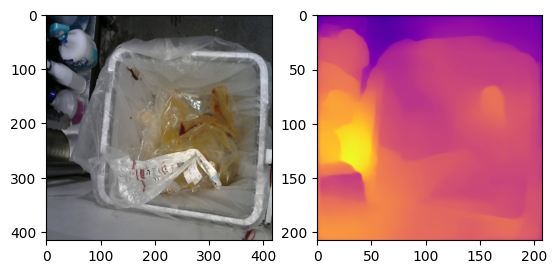

In [12]:
output=visualize_depth_map(visualize_samples, test=True, model=model)

In [ ]:
output.shape

In [ ]:
output